# Transformación de la variable objetivo

Las técnicas de regresión lineal (y otras técnicas de regresión) funcionan mejor cuando la distribución de la variable objetivo es aproximadamente simétrica respecto a su media o mediana.

Cuando esto no ocurre es conveniente hacer una transformación no lineal sobre la variable objetivo de forma que la variable transformada tenga una distribución más adecuada.   

#### Importa modulos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#### Importa la base de datos diabetes de scikit-learn

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data   
y = diabetes.target

#### Transformación de la variable objetivo
$y'=\log(y+y_0) \quad \Longleftrightarrow \quad y=\exp(y'-y_0)$ 

In [3]:
y0=400
yp = np.log(y+y0)

#### Histogramas de la variable objetivo original y transformada

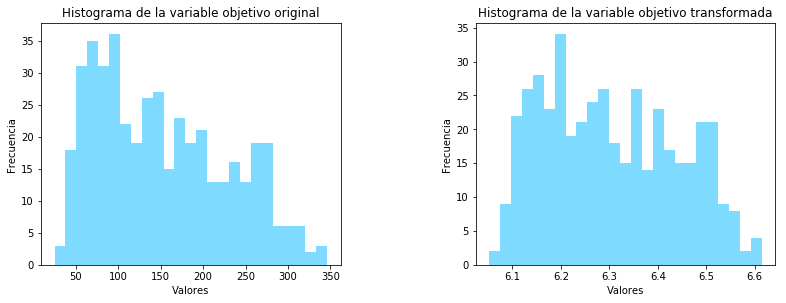

In [4]:
plt.figure()

plt.subplot(121)
n, bins, h = plt.hist(y, bins=25, histtype='stepfilled')
plt.setp(h, facecolor='#53cfff', alpha=0.75)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title('Histograma de la variable objetivo original')

plt.subplot(122)
n, bins, h = plt.hist(yp, bins=25, histtype='stepfilled')
plt.setp(h, facecolor='#53cfff', alpha=0.75)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title('Histograma de la variable objetivo transformada')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.8, hspace=0.25, wspace=0.45)
plt.show()

#### Regresión lineal
Entrena un regresor lineal y estima su error RMS con validación cruzada. Primero considerando la variable objetivo original y después considerando la variable objetivo transformada

In [5]:
modelo = linear_model.LinearRegression()
modelo_p = linear_model.LinearRegression()
K = 4
kf = KFold(K,shuffle=False,random_state=None)
conjuntos = kf.split(X,y) 

score = np.zeros(K,float) # inicializa los valores de precision
score_p = np.zeros(K,float) # inicializa los valores de precision

for k, (indices_train, indices_test) in enumerate(conjuntos):
    Xtrain, Xtest = X[indices_train], X[indices_test]
    ytrain, ytest = y[indices_train], y[indices_test]
    ytrain_p, ytest_p = yp[indices_train], yp[indices_test]
    
    modelo.fit(Xtrain, ytrain)
    prediccion = modelo.predict(Xtest)
    score[k]=np.sqrt(mean_squared_error(ytest,prediccion))
    
    modelo_p.fit(Xtrain, ytrain_p)
    prediccion_p = modelo_p.predict(Xtest)
    prediccion_p = np.exp(prediccion_p)-y0
    ytest_p = np.exp(ytest_p)-y0
    score_p[k]=np.sqrt(mean_squared_error(ytest_p,prediccion_p))
    
print()   
print("- Error RMS (variable objetivo original): %0.4f" % (score.mean()))
print("- Error RMS (variable objetivo transformada): %0.4f" % (score_p.mean()))


- Error RMS (variable objetivo original): 54.4065
- Error RMS (variable objetivo transformada): 54.2362
